In [1]:
import numpy as np
import pandas as pd

In [2]:
match = pd.read_csv('/kaggle/input/arnav-dataset/matches.csv')
delivery = pd.read_csv('/kaggle/input/arnav-dataset/deliveries.csv') 

In [3]:
match.head() 

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match.shape

(756, 18)

In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index() 

In [7]:
total_score_df = total_score_df[total_score_df['inning']==2] 

In [8]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id') 

In [9]:
match_df['team1'].unique() 

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
teams = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals','Delhi Capitals'] 

In [11]:
match_df['team1']= match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']= match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [12]:
match_df = match_df[match_df['team1'].isin(teams)] 
match_df = match_df[match_df['team2'].isin(teams)] 

In [13]:
match_df.shape

(640, 20)

In [14]:
match_df = match_df[match_df['dl_applied']==0] 

In [15]:
match_df = match_df[['match_id','city','winner','total_runs']] 

In [16]:
delivery_df = match_df.merge(delivery,on='match_id') 

In [17]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [18]:
delivery_df.shape

(72413, 24)

In [19]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [20]:
# Runs left
delivery_df['runs_left']= delivery_df['total_runs_x'] - delivery_df['current_score'] 

In [21]:
# Balls left
delivery_df['balls_left']= 126 - (delivery_df['over']*6+delivery_df['ball'])

In [22]:
# Wickets left
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype('int')
wickets=delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets
delivery_df.head() 

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,171,119,10
126,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,171,118,10
127,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,171,117,10
128,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,169,116,10
129,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,165,115,10


In [23]:
# CRR
delivery_df['crr']=(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

In [24]:
# RRR
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left'] 

In [25]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

delivery_df['result'] = delivery_df.apply(result,axis=1) 

In [26]:
final_df = delivery_df[['batting_team','bowling_team','city',
                        'runs_left','balls_left','wickets','total_runs_x',
                        'crr','rrr','result']]

In [27]:
final_df.sample(final_df.shape[0]) 

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
87482,Rajasthan Royals,Sunrisers Hyderabad,Abu Dhabi,89,69,7,135,5.411765,7.739130,1
73469,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,48,36,6,130,5.857143,8.000000,1
142813,Rajasthan Royals,Kings XI Punjab,Mohali,120,87,9,180,10.909091,8.275862,0
123964,Chennai Super Kings,Kings XI Punjab,Mohali,113,60,7,206,9.300000,11.300000,0
86783,Mumbai Indians,Kolkata Knight Riders,Abu Dhabi,43,44,8,122,6.236842,5.863636,0
...,...,...,...,...,...,...,...,...,...,...
109298,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,72,65,6,132,6.545455,6.646154,0
5541,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,54,81,9,159,16.153846,4.000000,1
3309,Delhi Daredevils,Mumbai Indians,Mumbai,102,79,4,128,3.804878,7.746835,0
82316,Sunrisers Hyderabad,Chennai Super Kings,Hyderabad,69,57,5,146,7.333333,7.263158,0


In [45]:
final_df = final_df.copy()
final_df.dropna(inplace=True) 

In [29]:
final_df = final_df[final_df['balls_left']!=0] 

In [30]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [31]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
22755,Rajasthan Royals,Kings XI Punjab,Cape Town,104,110,9,112,4.800000,5.672727
149374,Chennai Super Kings,Mumbai Indians,Hyderabad,96,73,9,157,7.787234,7.890411
4619,Mumbai Indians,Royal Challengers Bangalore,Mumbai,95,66,8,165,7.777778,8.636364
90058,Kolkata Knight Riders,Kings XI Punjab,Abu Dhabi,70,65,7,109,4.254545,6.461538
135530,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata,99,48,8,187,7.333333,12.375000
...,...,...,...,...,...,...,...,...,...
103573,Rajasthan Royals,Sunrisers Hyderabad,Visakhapatnam,120,108,10,131,5.500000,6.666667
43015,Deccan Chargers,Royal Challengers Bangalore,Bangalore,91,50,7,186,8.142857,10.920000
44720,Delhi Daredevils,Mumbai Indians,Mumbai,47,43,4,144,7.558442,6.558140
105544,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,118,89,8,154,6.967742,7.955056


In [43]:
# One hot encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough') 

In [44]:
from sklearn.linear_model import LogisticRegression
# NOT IN USE from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])
pipe.fit(X_train,y_train) 

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [34]:
y_pred = pipe.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) 


0.7231060340598501

In [35]:
pipe.predict_proba(X_test)[10]

array([0.8122225, 0.1877775])

In [36]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [37]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [38]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 165


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,43.3,56.7
10467,2,8,0,37.7,62.3
10473,3,1,0,33.5,66.5
10479,4,7,1,48.4,51.6
10485,5,12,0,42.6,57.4
10491,6,13,0,36.9,63.1
10497,7,9,0,31.9,68.1
10505,8,15,0,26.8,73.2
10511,9,7,0,22.9,77.1
10518,10,17,0,18.6,81.4


Text(0.5, 1.0, 'Target-165')

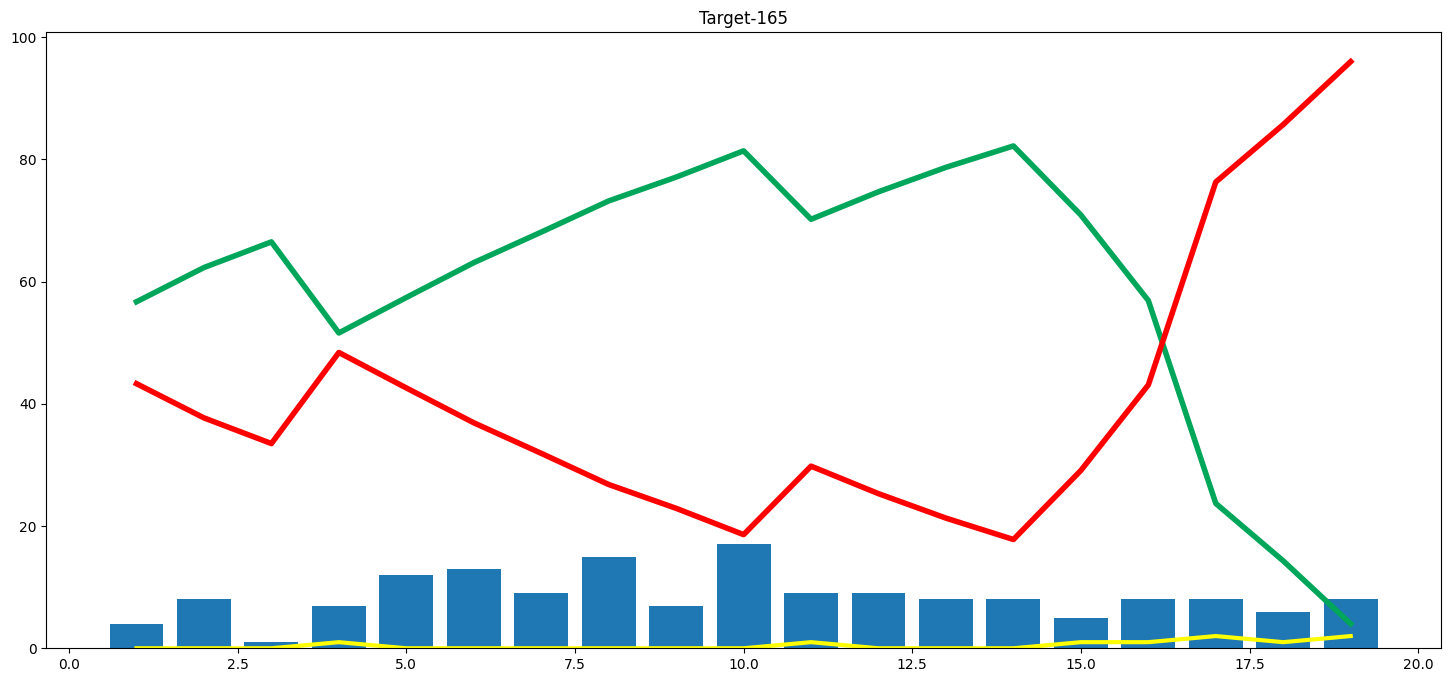

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [40]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [41]:
delivery_df['city'].unique() 

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [42]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))